Enter final x-coordinate xf:  4
Enter final y-coordinate yf (yf < c^2/g):  2


Calculated C0 = 0.894427


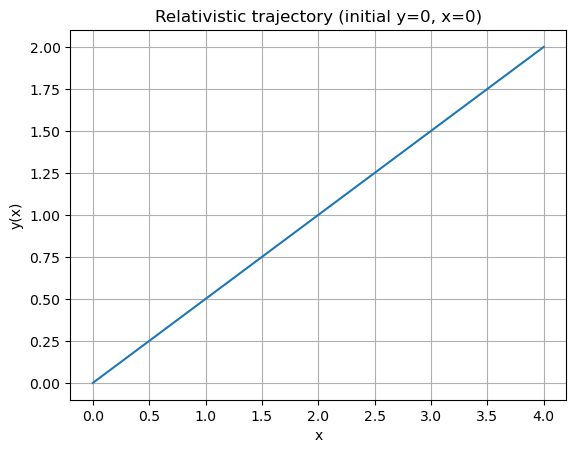

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# -----------------------------
# Constants
# -----------------------------
c = 3e8   # speed of light in m/s
g = 9.8   # gravity in m/s^2

# -----------------------------
# User input
# -----------------------------
xf = float(input("Enter final x-coordinate xf: "))
yf = float(input("Enter final y-coordinate yf (yf < c^2/g): "))

# -----------------------------
# Initial point
# -----------------------------
x0 = 0
y0 = 0

# -----------------------------
# Define the ODE for given C0
# -----------------------------
def dydx(x, y, C0):
    inside_sqrt = ((1 - g*y/c**2)/C0)**2 - 1
    if inside_sqrt < 0:
        return 0
    return np.sqrt(inside_sqrt)

# -----------------------------
# Define function to match yf
# -----------------------------
def final_y_diff(C0):
    sol = solve_ivp(lambda x, y: dydx(x, y, C0), [x0, xf], [y0], max_step=0.01)
    return sol.y[0, -1] - yf  # difference between computed yf and target yf

# -----------------------------
# Solve for C0 numerically
# -----------------------------
# C0 must be less than 1 - g*y/c^2, start with a safe guess
C0_guess_min = 0.001
C0_guess_max = 0.999

C0 = brentq(final_y_diff, C0_guess_min, C0_guess_max)
print(f"Calculated C0 = {C0:.6f}")

# -----------------------------
# Solve ODE with found C0
# -----------------------------
sol = solve_ivp(lambda x, y: dydx(x, y, C0), [x0, xf], [y0], max_step=0.01)

# -----------------------------
# Plot
# -----------------------------
plt.plot(sol.t, sol.y[0])
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Relativistic trajectory (initial y=0, x=0)")
plt.grid(True)
plt.show()


In [3]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# -----------------------------
# Constants
# -----------------------------
c = 3e8  # speed of light in m/s
g = 9.8  # gravitational acceleration

# -----------------------------
# Initial point
# -----------------------------
x0 = 0
y0 = 0

# -----------------------------
# Define the ODE for given C0
# -----------------------------
def dydx(x, y, C0):
    inside_sqrt = ((1 - g*y/c**2)/C0)**2 - 1
    if inside_sqrt < 0:
        return 0
    return np.sqrt(inside_sqrt)

# -----------------------------
# Function to match yf
# -----------------------------
def final_y_diff(C0, xf, yf):
    sol = solve_ivp(lambda x, y: dydx(x, y, C0), [x0, xf], [y0], max_step=0.01)
    return sol.y[0, -1] - yf

# -----------------------------
# Function to plot trajectory
# -----------------------------
def plot_trajectory(xf, yf):
    # Avoid unphysical yf
    if yf >= c**2 / g:
        print(f"yf must be less than {c**2/g:.2e}")
        return
    
    # Solve for C0
    try:
        C0 = brentq(final_y_diff, 0.001, 0.999, args=(xf, yf))
    except ValueError:
        print("No valid C0 found for these xf and yf.")
        return
    
    # Solve ODE
    sol = solve_ivp(lambda x, y: dydx(x, y, C0), [x0, xf], [y0], max_step=0.01)
    
    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(sol.t, sol.y[0], lw=2)
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.title(f"Relativistic trajectory (C0={C0:.6f})")
    plt.grid(True)
    plt.show()

# -----------------------------
# Create sliders
# -----------------------------
xf_slider = widgets.FloatSlider(value=10.0, min=0.1, max=50.0, step=0.1, description="xf")
yf_slider = widgets.FloatSlider(value=1.0, min=0.01, max=1e16, step=1.0, description="yf")

ui = widgets.VBox([xf_slider, yf_slider])

out = widgets.interactive_output(plot_trajectory, {'xf': xf_slider, 'yf': yf_slider})

display(ui, out)


Output()